In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [3]:
df_ab = pd.read_csv('ab_data.csv')
df_ab.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
df_ab.shape[0]

294478

In [6]:
len(df_ab.user_id.unique())

290584

In [7]:
converted = df_ab.converted.value_counts()
print(f"Proportion of converted: {converted[1] / (converted[0] + converted[1])}")

Proportion of converted: 0.11965919355605512


In [8]:
first = df_ab.query('group=="treatment" & landing_page!="new_page"')
second = df_ab.query('landing_page=="new_page" & group!="treatment"')
len(first) + len(second)

3893

In [9]:
pd.isna(first).count()

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

In [14]:
pd.isna(second).count()

user_id         1928
timestamp       1928
group           1928
landing_page    1928
converted       1928
dtype: int64

In [16]:
import pandas as pd

# Assuming first and second are the two DataFrames you want to concatenate

# Create a copy of the first DataFrame
df2 = first.copy()

# Append the second DataFrame to the first DataFrame
df2 = pd.concat([df2, second], ignore_index=True)

# Display the first 5 rows of the resulting Data
df2.head(5)

,user_id,timestamp,group,landing_page,converted
0,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
1,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
2,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
3,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
4,748761,2017-01-10 15:47:44.445196,treatment,old_page,0


In [18]:

len(df2)


3893

In [20]:
df_mess = df2.copy()

In [21]:
df_mess.head(5)

,user_id,timestamp,group,landing_page,converted
0,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
1,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
2,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
3,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
4,748761,2017-01-10 15:47:44.445196,treatment,old_page,0


In [22]:
df2 = pd.concat([df_ab, df_mess, df_mess]).drop_duplicates(keep=False)
df2.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


In [23]:
len(df2)

290585

In [24]:
len(df2.user_id.unique())

290584

In [25]:
df2_dup = df2[df2.user_id.duplicated()]
df2_dup

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [26]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [27]:
df2.drop(1899, inplace=True)
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [28]:
df2_conv = df2[df2.converted == 1]

In [29]:
all_convert = len(df2_conv)
all_convert

34753

In [31]:
all_peeps = len(df2)
all_peeps

290584

In [32]:
all_convert / all_peeps

0.11959708724499628

In [33]:
df2_all_control = df2[df2.group == 'control']
all_control = len(df2_all_control)
all_control

145274

In [34]:
df2_control_conv = df2_all_control[df2_all_control.converted == 1]
len(df2_control_conv)

17489

In [35]:
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

In [36]:
df2.query('group == "treatment"')['converted'].mean()

0.11880806551510564

In [37]:
len(df2[df2.landing_page == 'new_page']) / all_peeps

0.5000619442226688

In [39]:
# a/b test
p_new = df2.converted.mean()
p_new

0.11959708724499628

In [40]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

In [41]:
p_new - p_old

0.0

In [42]:
n_new = len(df2[df2.group == 'treatment'])
n_new

145310

In [55]:
n_old = len(df2[df2.group == 'control'])
n_old

145274

In [54]:
new_page_converted = []
new_page_converted = np.random.choice([0,1],n_new,[1-p_new,p_new])

In [56]:
old_page_converted = []
old_page_converted = np.random.choice([0,1],n_old,[1-p_old,p_old])

In [57]:
obs_diff = np.mean(new_page_converted) - np.mean(old_page_converted)
obs_diff

0.0005921280523742412

In [58]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

#mpl.style.use('ggplot')
%matplotlib inline

<ipython-input-61-e1d1e83497b0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(p_diffs, bins=10, kde=False, rug=True);


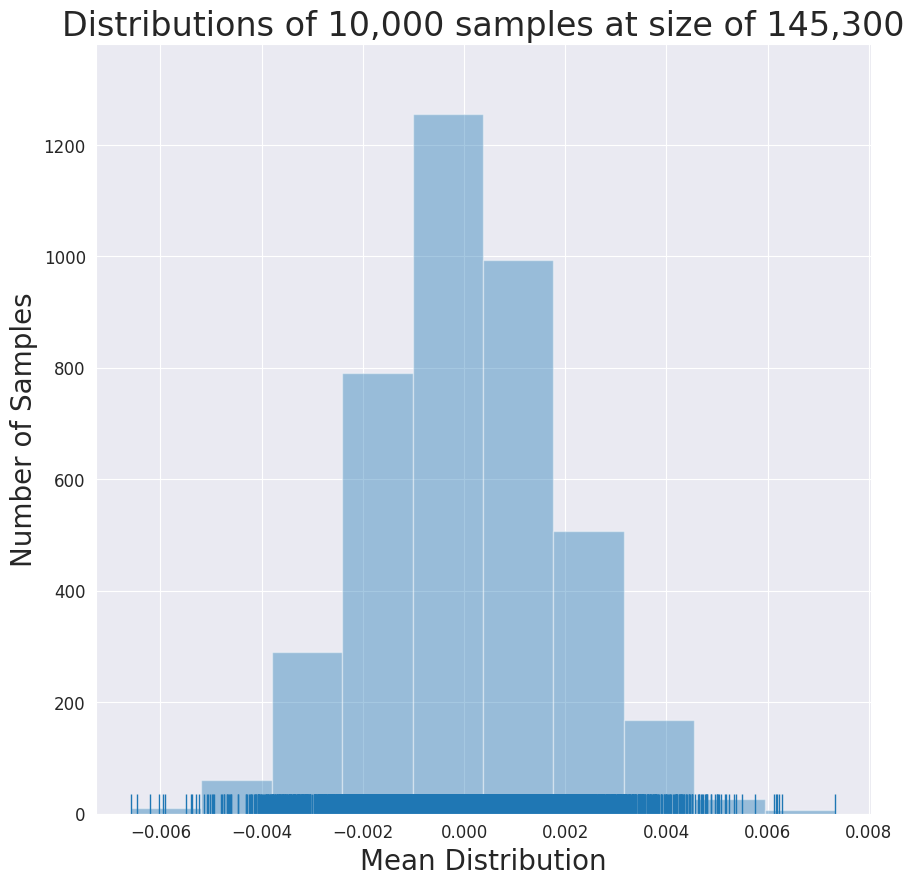

In [61]:
plt.figure(figsize=(10,10))
sns.distplot(p_diffs, bins=10, kde=False, rug=True);

plt.xlabel('Mean Distribution', fontsize=20)
plt.title('Distributions of 10,000 samples at size of 145,300', fontsize=24)
plt.ylabel('Number of Samples', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [63]:
p_diffs = np.array(p_diffs)
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

In [64]:
(null_vals > obs_diff).mean()

0.3785888077858881

In [65]:
actual_new_conv = df2[df2.landing_page == 'new_page']['converted'].mean()
actual_old_conv = df2[df2.landing_page == 'old_page']['converted'].mean()

actual_diff = actual_new_conv - actual_old_conv

print(f"Actual difference in new & old conversion means: {actual_diff}")

Actual difference in new & old conversion means: -0.0015782389853555567


In [69]:
diff_prop = np.greater(p_diffs,actual_diff)

In [70]:
diff_prop.mean()

0.816301703163017

In [71]:
import statsmodels.api as sm

old_data = df2[df2.landing_page == 'old_page']['converted']
mu_convert_old = df2[df2.landing_page == 'old_page']['converted'].mean()
std_convert_old = df2[df2.landing_page == 'old_page']['converted'].std()

new_data = df2[df2.landing_page == 'new_page']['converted']
mu_convert_new = df2[df2.landing_page == 'new_page']['converted'].mean()
std_convert_new = df2[df2.landing_page == 'new_page']['converted'].std()

n_old = len(df2[df2.group == 'control'])
n_new = len(df2[df2.group == 'treatment'])

print(n_old,mu_convert_old,std_convert_old)
print(n_new,mu_convert_new,std_convert_new)

145274 0.1203863045004612 0.3254138459199159
145310 0.11880806551510564 0.3235636406751732


In [72]:
sm.stats.ztest(old_data,new_data,alternative='two-sided')

(1.3109235634981506, 0.18988358901317048)

In [73]:
mu_convert_old

0.1203863045004612

In [74]:
mu_convert_new

0.11880806551510564

In [75]:
sm.stats.proportions_ztest(mu_convert_new * n_new, n_new, mu_convert_old, alternative='larger')

(-1.859354929150913, 0.9685115770700896)